In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

from glob import glob
from pathlib import Path
import torch

In [2]:
def load_mask():
    print('loading mask...')
    rle_masks = pd.read_csv('../WC_input/model_50A_slim_ensemble.csv')
    rle_masks = rle_masks[rle_masks['rle_mask'].isnull() == False]
    rle_masks.index = rle_masks['id']
    del rle_masks['id']
    rle_masks = rle_masks.to_dict('index')
    return rle_masks

In [3]:
rle_masks = load_mask()

loading mask...


In [5]:
# rle_masks['PM-WWA-20060610-130']

In [6]:
def do_length_decode(rle, H=192, W=384, fill_value=255):
    mask = np.zeros((H,W), np.uint8)
    if type(rle).__name__ == 'float': return mask
    mask = mask.reshape(-1)
    rle = np.array([int(s) for s in rle.split(' ')]).reshape(-1, 2)
    for r in rle:
        start = r[0]-1
        end = start + r[1]
        mask[start : end] = fill_value
    mask = mask.reshape(W, H).T   # H, W need to swap as transposing.
    return mask

In [12]:
def load_bbox():
    # Image,x0,y0,x1,y1
    print('loading bbox...')
    bbox = pd.read_csv('../WC_input/bboxs.csv')
    Images = bbox['Image'].tolist()
    x0s = bbox['x0'].tolist()
    y0s = bbox['y0'].tolist()
    x1s = bbox['x1'].tolist()
    y1s = bbox['y1'].tolist()
    bbox_dict = {}
    for Image,x0,y0,x1,y1 in zip(Images,x0s,y0s,x1s,y1s):
        bbox_dict[Image] = [x0, y0, x1, y1]
    return bbox_dict

In [16]:
def add_margin(x0,y0,x1,y1):
    crop_margin = 0.05
    dx = x1-x0
    dy = y1-y0
    x0 = x0-dx*crop_margin
    x1 = x1+dx*crop_margin+1
    y0 = y0-dy*crop_margin
    y1 = y1+dy*crop_margin+1
    if (x0<0): x0=0
#     if (x1>img_shape[1]): x1=img_shape[1]
    if (y0<0): y0=0
#     if (y1>img_shape[0]): y1=img_shape[0]
    return x0,y0,x1,y1

In [13]:
bbox_dict = load_bbox()

loading bbox...


In [7]:
names = ['PM-WWA-20080721-013.jpg',
         'PM-WWA-20090725-005.jpg',
         'PM-WWA-20160429-356.jpg',
         'PM-WWA-20110731-144.jpg']

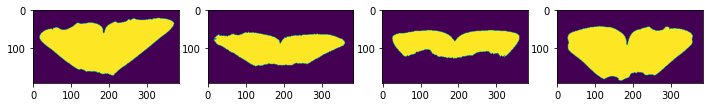

In [8]:
_, axs = plt.subplots(1,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = do_length_decode(rle_masks[names[i].split('.')[0]]['rle_mask'])
    ax.imshow(img)

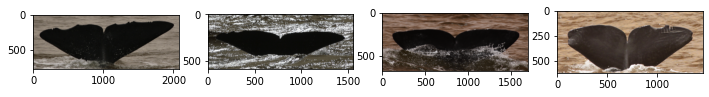

In [9]:
WC_PATH = '../WC_input/data/'
_, axs = plt.subplots(1,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = cv2.imread(WC_PATH + names[i])
    ax.imshow(img)

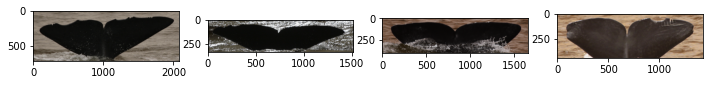

In [17]:
WC_PATH = '../WC_input/data/'
_, axs = plt.subplots(1,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = cv2.imread(WC_PATH + names[i])
    x0, y0, x1, y1 = bbox_dict[names[i]]
    x0,y0,x1,y1 = add_margin(x0,y0,x1,y1)
    img = img[int(y0):int(y1), int(x0):int(x1)]
    ax.imshow(img)

(192, 384)
(192, 384)
(192, 384)
(192, 384)


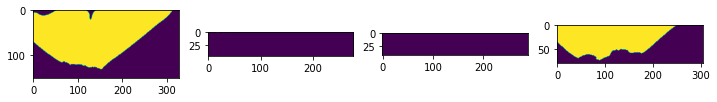

In [23]:
_, axs = plt.subplots(1,4,figsize=(12,6))
for i, ax in enumerate(axs.flatten()):
    img = do_length_decode(rle_masks[names[i].split('.')[0]]['rle_mask'])
    print (img.shape)
    x0, y0, x1, y1 = bbox_dict[names[i]]
#     x0,y0,x1,y1 = add_margin(x0,y0,x1,y1)
    img = img[int(y0):int(y1), int(x0):int(x1)]

    ax.imshow(img)